In [6]:
from datetime import datetime
from google.cloud import storage
from google.cloud import bigquery
import pandas as pd
import os
import re

# gcp credentailファイルの読み込み
# os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/Users/USERNAME/GOOGLE_CREDENTIAL.json"

class UpDownLoad:
    # BQクライアント初期化
    bq_client = bigquery.Client()

    # ファイルタイプ一覧の辞書
    content_dict = {
        "csv": "text/csv",
        "txt": "text/plain",
        "jpeg|jpg": "image/jpeg",
        "png": "image/png",
        "pdf": "application/pdf",
        "zip": "application/zip"
    }

    def data2gcs(self, data, bucket_name, folder_name, file_name):
        try:
            # GCSクライアント初期化
            client = storage.Client()

            # バケットオブジェクト取得
            bucket = client.get_bucket(bucket_name)

            # 保存先フォルダとファイル名作成
            blob = bucket.blob(os.path.join(folder_name, file_name))

            # コンテントタイプ判定
            for k, v in self.content_dict.items():
                if re.search(rf"\.{k}$", file_name):
                    content_type = v
            # 保存
            if content_type == 'text/csv':
                blob.upload_from_string(data=data.to_csv(sep=",", index=False), content_type=content_type)
            else:
                print("t")
                blob.upload_from_string(data=data, content_type=content_type)
            return "success"
        except Exception as e:
            return str(e)

    def make_bq(self, df, table_name):
        try:
            # _TABLE_SUFFIX作成のためのdate
            date = datetime.today().strftime("%Y%m%d")
            dataset, new_table = table_name.split(".")
            dataset_ref = self.bq_client.dataset(dataset)
            table_ref = dataset_ref.table(f'{new_table}_{date}')
            self.bq_client.load_table_from_dataframe(df.astype("str"), table_ref).result()
            return "success"
        except Exception as e:
            return str(e)

    def read_bq(self, query):
        return self.bq_client.query(query).to_dataframe()
# 折りたたむ





In [7]:
load = UpDownLoad()

In [7]:
# BigQueryへデータをアップロード
table_name = "mytweets.tweets1"
data = pd.DataFrame([], columns=["test_col"])
res_bq = load.make_bq(data, table_name)
print(res_bq)

# BigQueryへアップロードしたデータをデータフレームとして取得
project_id = "tactile-wave-267212"
bq_tb = f"`{project_id}.{table_name}_*`"
query = f"select * from {bq_tb}"
bq_df = load.read_bq(query)

success


In [9]:
bq_tb

'`tactile-wave-267212.mytweets.tweets1_*`'

In [10]:
bq_df

test_col
0         0
1         1
2         2
3         3
4         4
..      ...
95       95
96       96
97       97
98       98
99       99

[100 rows x 1 columns]

In [8]:
data

test_col
0          0
1          1
2          2
3          3
4          4
..       ...
95        95
96        96
97        97
98        98
99        99

[100 rows x 1 columns]

In [12]:
date = datetime.today().strftime("%Y%m%d%H%M%S")
bucket_name = "mytweet_840"
folder_name = "tweet"
file_name = f"{date}_{folder_name}.csv"
# データをGCSへアップロードする
res = load.data2gcs(data, bucket_name, folder_name, file_name)
print(res)

success


In [ ]:
import MeCab

In [ ]:
df = get_tweets(request)
mecab = MeCab.Tagger("-Ochasen")
words = []
# Mecabで形態素解析を実施
for text in df.TW_TEXT:
    node = mecab.parseToNode(text)

    while node:
        word_type = node.feature.split(",")[0]

        # 取得する単語は、"名詞", "動詞", "形容詞", "副詞"
        if word_type in ["名詞", "動詞", "形容詞", "副詞"]:
            words.append(node.surface)

        node = node.next

# wordcloudで出力するフォントを指定
font_path = r"C:\WINDOWS\Fonts\HGRGE.TTC"

txt = " ".join(words)


In [4]:
from wordcloud import WordCloud
txt = """
Pythonのスキルを身に付けるために AtCoder で 競技プログラミング を始めました。AtCoderでは初心者のために、AtCoder Beginner Contest（以下ABC）というコンテストを開催しています。コンテストでは、難易度に応じてA問題からD問題まで問題が用意されています。概ねA問題とB問題はPythonの実装方法を知っていれば解ける問題が多いです。A問題とB問題が解けるようになるために、本記事で実装方法を整理しました。
"""
# ストップワードの設定　※これは検索キーワードによって除外したほうがいい単語を設定
stop_words = ['https', 'OracleInnovation', 'Innovation', 'Oracle', 'co', 'the', 'of', 'Summit', 'Tokyo', 'Japan',
              'RT', u'説明', u'データ', u'する', u'オラクル', u'日本', u'提供', u'開催', u'お客様']

# 解析した単語、ストップワードを設定、背景の色は黒にしてます
wordcloud = WordCloud(background_color="black",
                      width=800, height=600).generate(txt)
# wordcloud.to_file(".../static/tweetapp/wordcloud.png")

In [18]:
date = datetime.today().strftime("%Y%m%d%H%M%S")
bucket_name = "mytweet_840"
folder_name = "tweet"
file_name = f"{date}_{folder_name}.png"

res = load.data2gcs(str(img.tobytes()), bucket_name, folder_name, file_name)
print(res)

t
success


In [8]:
res = wordcloud.to_file("test.png")

In [5]:
img = wordcloud.to_image()

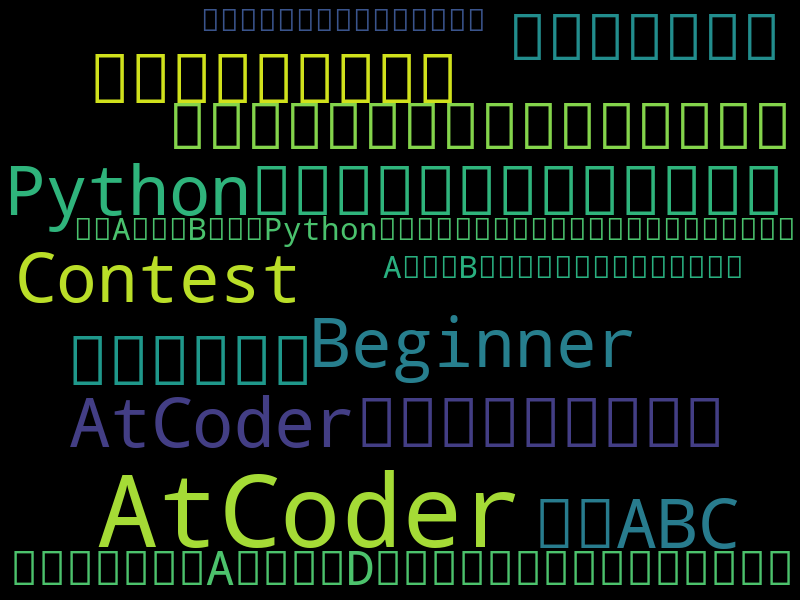

In [26]:
img

In [62]:
img.tobytes() == arr.tobytes()

True

In [51]:
arr = wordcloud.to_array()


In [53]:
arr

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [52]:
arr.tobytes()

b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [54]:
import numpy as np

In [55]:
x = np.array([[0,1], [2,3]], dtype="<u2")

In [58]:
np.array([[0,1], [2,3]]).tobytes()

b'\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x02\x00\x00\x00\x00\x00\x00\x00\x03\x00\x00\x00\x00\x00\x00\x00'

In [60]:
x.tobytes()

b'\x00\x00\x01\x00\x02\x00\x03\x00'

In [63]:
text = "sss"

In [64]:
pd.DataFrame([text], columns=["test_col"])

test_col
0      sss

In [67]:
import MeCab

In [69]:
mecab = MeCab.Tagger("-Ochasen")

In [93]:
text = """
Pythonのスキルを身に付けるために AtCoder で 競技プログラミング を始めました。AtCoderでは初心者のために、AtCoder Beginner Contest（以下ABC）というコンテストを開催しています。コンテストでは、難易度に応じてA問題からD問題まで問題が用意されています。概ねA問題とB問題はPythonの実装方法を知っていれば解ける問題が多いです。A問題とB問題が解けるようになるために、本記事で実装方法を整理しました。
"""


In [94]:
import time

In [96]:
words = []
import time
start = time.time()
for text in text.split():
    node = mecab.parseToNode(text)
    while node:
        word_type = node.feature.split(",")[0]

        # 取得する単語は、"名詞", "動詞", "形容詞", "副詞"
        if word_type in ["名詞", "動詞", "形容詞", "副詞"]:
            words.append(node.surface)

        node = node.next

time.time()-start

0.024712800979614258

In [81]:
    [_
    for _ in range(100)
]

SyntaxError: invalid syntax (<ipython-input-81-d1eb9ee23826>, line 3)

In [102]:
import requests
import json

In [98]:
url = "https://us-central1-tactile-wave-267212.cloudfunctions.net/function-2?message=hayatakun52n5"
requests.get(url)


In [105]:

res.text.replace("'",'"')
# for i in json.loads(res.text.replace("'",'"')):
#     print(i)
json.loads(res.text.replace("'",'"'))

['強みをわかっておられる',
 'あっあっあっ最強最強最強',
 '昼飯食った直後に何を言ってるんだ',
 'RT @pensaki_0721: イタチ「月読の世界では空間・時間・質量を俺が支配する...俺が5数えたらお前は射精することになる...」イタチ「5...4...3...2...1...ゼロ！ゼロ！ゼロ！！！」大蛇丸「やだぁぁぁぁぁぁぁ💞💞💞💞💞感じすぎて漢字になっち…',
 'RT @pensaki_0721: ASMR「お兄さんが感じてる顔、とっても素敵ですよ、素敵すぎて...」俺の中の大蛇丸「ステーキになったわね...」？？？？？？？？？？',
 'ゲーム依存とかよりも特に価値もないのにYouTube無限に見まくっちゃうほうがよっぽど依存性高いと思う',
 'Django強い日本人誰かいねえのかーーー',
 '爽バニラが売ってないコンビニ全部潰れていい',
 'キラくん話が違うわよ聞いてないわよー',
 'バイト接客からスタートになったんですけど大丈夫これ？',
 'お金に余裕が出てきてちょーしにのるとすーーぐスタバいく',
 '俺にもっと働かせろ！時間ならくれてやる！',
 'じゃ来月のバイト代で余裕で叙々苑代支払えますねわはははは(シフトたくさん入れなかったら死亡)',
 '今までクレカの支払いについて普通に勘違いしてたけど、2月分の支払いは翌月(3月末)に引き落とされるのね親から金借りた意味がなかった',
 'いやーーいいよねーーーー',
 '鬼がかってるシーンを見るなどをした',
 'もうこのシリーズ5億回見た',
 '黄色（クルル：テラ子安）の変態カレー集１ #sm11507047 #ニコニコ動画 https://t.co/PquljAByDR',
 'クルル曹長好きすぎて小学校でずっと真似してたけどまわりにケロロ知ってるやつおらんくてただのやべーやつだと思われてた',
 'テラ子安おじさんは小さいころのクルル曹長のイメージが強すぎてロズワール見てる時も「カレー食べるにょーー」とかもしかしたら言い出すんじゃないかと思って無駄に身構えてたりする']

In [106]:
tw_id = "aaaa"
url = "https://us-central1-tactile-wave-267212.cloudfunctions.net/function-2?message=f'{tw_id}'"
url

"https://us-central1-tactile-wave-267212.cloudfunctions.net/function-2?message=f'{tw_id}'"